# Distinguishing Sentiments
UCB Extension HW7 written by A. Lam

# Analysis
- Observation 1: Most Neutral News Outlet of the 5: CBS
- Observation 2: Most Positive News Outlet of the 5: BBC
- Observation 3: Most Negative News Outlet of the 5: Fox

# Setup

In [21]:
# Dependencies
!pip install vaderSentiment==2.5
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time, strftime, gmtime
import sys
sys.path.append('/Users/alam/homework/Quarantine/Keys')
import Twit
import math

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = Twit.CKey
consumer_secret = Twit.CSecret
access_token = Twit.AToken
access_token_secret = Twit.ASecret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Initialization of script structure
networks = ['@CNN','@BBC','@CBSTweet','@FoxNews', '@nytimes']
n_tweets = 100
n_pages = math.ceil(n_tweets/20)
output = pd.DataFrame({'User' : [],
            'Tweet': [],
            'TweetsAgo': [],           
            'Compound Score' : [],
            'Positive Score' : [],
            'Neutral Score' : [],
            'Negative Score' : []})

# script execution
for network in networks:
    target_user = network
    counter = 0
    for i in range(n_pages):
        public_tweets = api.user_timeline(target_user, page = i)
        for tweet in public_tweets:
            counter += 1
            target_string = tweet['text']
            compound = analyzer.polarity_scores(target_string)["compound"]
            pos = analyzer.polarity_scores(target_string)["pos"]
            neu = analyzer.polarity_scores(target_string)["neu"]
            neg = analyzer.polarity_scores(target_string)["neg"]
            this_output = pd.DataFrame({
                'User': target_user,
                'Tweet': target_string,
                'TweetsAgo': counter, 
                'Compound Score' : compound,
                'Positive Score' : pos,
                'Neutral Score' : neu,
                'Negative Score' : neg
            },index=[counter])
            output = output.append(this_output)
            if counter == n_tweets:
                break

In [12]:
output.tail()

,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet,TweetsAgo,User
96,0.0772,0.000,0.929,0.071,New research challenges the deeply held notion...,96.0,@nytimes
97,0.0000,0.000,1.000,0.000,The Philippines is phasing out its most widely...,97.0,@nytimes
98,0.6369,0.000,0.634,0.366,What are some good TV romances? @margeincharge...,98.0,@nytimes
99,-0.2023,0.141,0.859,0.000,Why Lebanon’s prime minister had that strange ...,99.0,@nytimes
100,-0.7717,0.330,0.549,0.121,"RT @nytopinion: No matter what Mueller finds, ...",100.0,@nytimes


In [10]:
output.groupby(['User']).mean()

,Compound Score,Negative Score,Neutral Score,Positive Score,TweetsAgo
User,,,,,
@BBC,0.157315,0.04548,0.84451,0.11000,50.5
@CBSTweet,0.291349,0.03824,0.81148,0.15028,50.5
@CNN,0.008613,0.06575,0.85607,0.07815,50.5
@FoxNews,-0.074605,0.09710,0.84243,0.06049,50.5
@nytimes,0.035665,0.05316,0.87847,0.06835,50.5


# Save Tweets to File

In [11]:
# Print output to File
output.to_csv('NewsOutletTweets_' + strftime('%d%b%Y', gmtime()) + '.csv',index = False)

# Plot Tweet Polarity

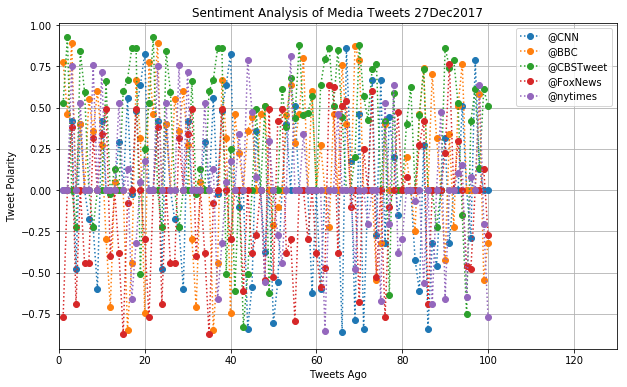

In [50]:
users = output['User'].unique()
padding = 30
colors = ['b','g','r','c','y']

plt.figure(figsize = [10,6])
for user in users:
    tweets = output.loc[output['User'] == user]
    plt.plot(tweets['TweetsAgo'],tweets['Compound Score'],'o:', label = user)
plt.xlim([0,n_tweets + padding])
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets %s' % strftime('%d%b%Y', gmtime()))
plt.legend(loc = 'upper right')
plt.grid(True)
plt.savefig('SentimentAnalysis%s.png' % strftime('%d%b%Y', gmtime()))
plt.show()

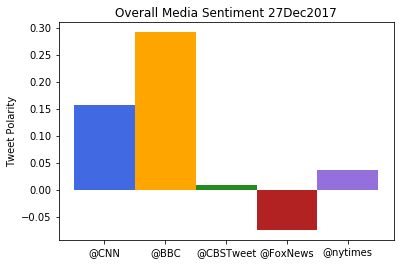

In [46]:
plt.bar(np.arange(len(users)),output.groupby(['User'])['Compound Score'].mean(),
        color = ['royalblue','orange','forestgreen','firebrick','mediumpurple'], width= 1)
plt.xticks(np.arange(len(users)),users)
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment %s' % strftime('%d%b%Y', gmtime()))
plt.savefig('OverallSentiment%s.png' % strftime('%d%b%Y', gmtime()))
plt.show()